# Implimentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

## Data Cleaning and Preprocessing

In [2]:
# Preliminary data inspection
df = pd.read_csv('./src/slam_articles_with_country.csv')
# Handle missing values if any
df.dropna(subset=['year', 'country', 'is-referenced-by-count'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12214 entries, 0 to 46910
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   12210 non-null  object 
 1   DOI                     12214 non-null  object 
 2   publisher               12214 non-null  object 
 3   publisher_location      3827 non-null   object 
 4   year                    12214 non-null  int64  
 5   type                    12212 non-null  object 
 6   score                   12212 non-null  object 
 7   reference-count         12214 non-null  float64
 8   is-referenced-by-count  12214 non-null  float64
 9   authors                 12131 non-null  object 
 10  publisher_affiliation   8133 non-null   object 
 11  country                 12214 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.2+ MB


In [3]:
df.describe()

,year,reference-count,is-referenced-by-count
count,12214.000000,12214.000000,12214.000000
mean,2018.480760,23.216719,8.351728
std,5.174266,25.634312,32.359409
min,2002.000000,0.000000,0.000000
25%,2015.000000,4.000000,0.000000
50%,2021.000000,17.000000,1.000000
75%,2023.000000,35.000000,5.000000
max,2024.000000,715.000000,1349.000000


## Step 1: Quantitative Growth in SLAM Research

<Figure size 1000x600 with 0 Axes>

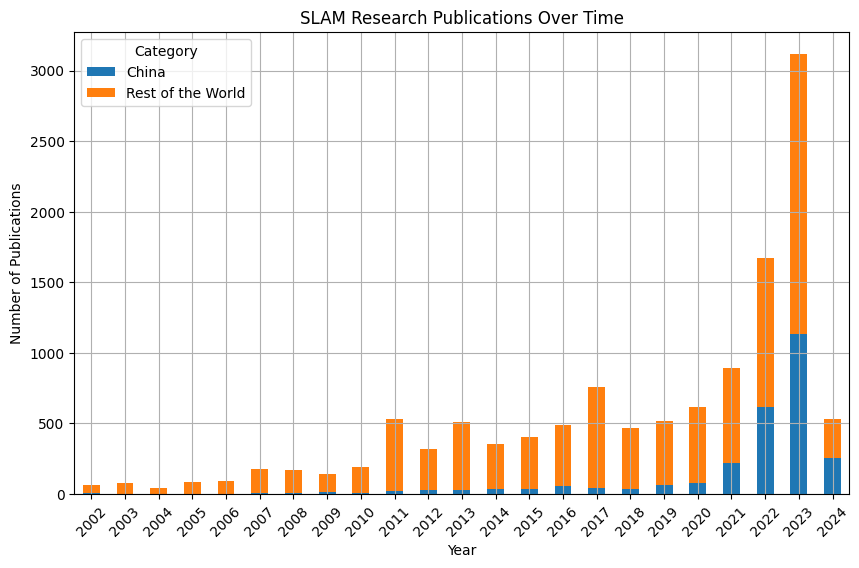

In [4]:
# Categorize articles by country (China vs. Rest of the World)
df['category'] = df['country'].apply(lambda x: 'China' if x == 'China' else 'Rest of the World')
pubs_by_year_country = df.groupby(['year', 'category']).size().unstack(fill_value=0)

# Show the plot
plt.figure(figsize=(10, 6))
# pubs_by_year_country.plot(kind='line')
pubs_by_year_country.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('SLAM Research Publications Over Time')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Publications')
plt.legend(title='Category')
plt.grid(True)
plt.show()

In [5]:
# # Categorize articles by country (China vs. Rest of the World)
# df['category'] = df['country'].apply(lambda x: 'China' if x == 'China' else 'Rest of the World')
# pubs_by_year_country = df.groupby(['year', 'category']).size().unstack(fill_value=0)

# # Adding new categories for predictions
# pubs_by_year_country.loc[2024, 'Predicted China'] = pubs_by_year_country['China'].iloc[-1] * 7
# pubs_by_year_country.loc[2024, 'Predicted Rest of the World'] = pubs_by_year_country['Rest of the World'].iloc[-1] * 7

# # Plotting actual data
# plt.figure(figsize=(12, 8))
# pubs_by_year_country.plot(kind='bar', stacked=True, color=['skyblue', 'orange', 'lightblue', 'pink'])

# bars = plt.gca().patches
# n = int(len(bars) / 2)
# hatches = [''] * n +  ['//'] * n
# for bar, hatch in zip(bars, hatches):  # loop over bars and hatches to set hatches in correct order
#     bar.set_hatch(hatch)
    
# plt.title('SLAM Research Publications Over Time (with 2024 Prediction)')
# plt.xlabel('Year')
# plt.xticks(rotation=45)
# plt.ylabel('Number of Publications')
# plt.legend(title='Category', loc='upper left')
# plt.grid(True)

# # Highlight the prediction part
# plt.gca().get_xticklabels()[-1].set_color('red')
# plt.gca().get_xticklabels()[-1].set_fontweight('bold')

# plt.show()

## Step 2: Correlation of Publication Growth

Correlation coefficient between China and Rest of the World growth rates: 0.36162410425839053


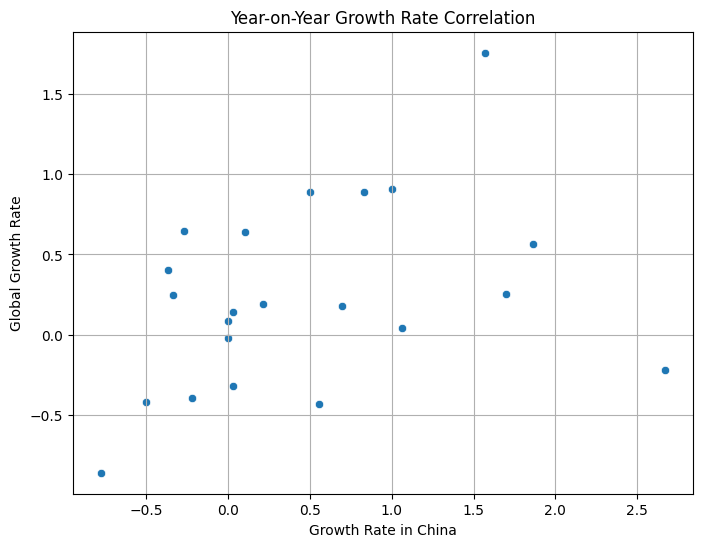

In [6]:
## Calculate year-on-year growth rate
growth_rate = pubs_by_year_country.pct_change().dropna()
## Correlation
correlation = growth_rate['China'].corr(growth_rate['Rest of the World'])
print(f'Correlation coefficient between China and Rest of the World growth rates: {correlation}')

## Scatter plot of growth rates
plt.figure(figsize=(8, 6))
sns.scatterplot(data=growth_rate, x='China', y='Rest of the World')
plt.title('Year-on-Year Growth Rate Correlation')
plt.xlabel('Growth Rate in China')
plt.ylabel('Global Growth Rate')
plt.grid(True)
plt.show()


## Step 3: Comparative Analysis of Publication Quality and Quantity

T-test results: Statistic=-12.421946418150366, p-value=3.302121464243547e-35


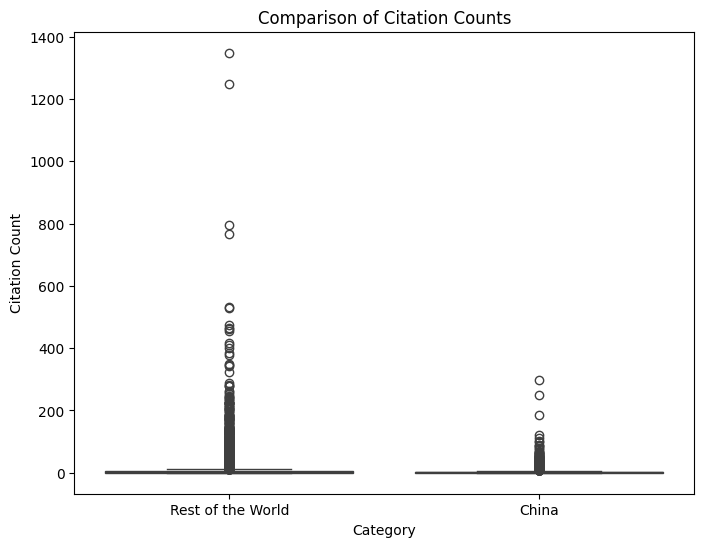

In [7]:
## Filtering and preparing data for quality analysis
china_df = df[df['category'] == 'China']
rest_world_df = df[df['category'] == 'Rest of the World']

## T-test for citation counts (assuming normal distribution)
t_stat, p_val = stats.ttest_ind(china_df['is-referenced-by-count'], rest_world_df['is-referenced-by-count'], equal_var=False)
print(f'T-test results: Statistic={t_stat}, p-value={p_val}')

## Box plot for citation counts
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='is-referenced-by-count', data=df)
plt.title('Comparison of Citation Counts')
plt.xlabel('Category')
plt.ylabel('Citation Count')
plt.show()

In [8]:
# Conducting Mann-Whitney U Test for comparison of citation counts
u_stat, p_value = stats.mannwhitneyu(china_df['is-referenced-by-count'], rest_world_df['is-referenced-by-count'], alternative='two-sided')

print(f'Mann-Whitney U Test results: U-Statistic={u_stat}, p-value={p_value}')

Mann-Whitney U Test results: U-Statistic=11912585.0, p-value=5.345945344724185e-08
